In [1]:
# import csv file , paste file path in place of movies.csv
import pandas as pd 
movies = pd.read_csv('movies.csv')
print(movies)

                       Movie                                Genre  Rating  \
0                   3 Idiots                        Comedy, Drama     8.4   
1                      Anand                                Drama     8.3   
2   Baahubali: The Beginning    Action, Adventure, Drama, Fantasy     8.3   
3          Bajrangi Bhaijaan                Action, Comedy, Drama     8.0   
4                      Black                      Drama, Thriller     8.2   
..                       ...                                  ...     ...   
75                Virumaandi                 Action, Crime, Drama     8.1   
76               Wake Up Sid               Comedy, Drama, Romance     7.6   
77                     Wazir                      Crime, Thriller     7.0   
78                   Welcome                        Comedy, Drama     6.4   
79                   Pathaan        Action, Adventure, Thriller\n     8.2   

    Year Box Office Performance Box Office Collection  
0   2009           

In [2]:
# importing json file
import pandas as pd
import json
movies = pd.read_csv('movies.csv')
# Define a function to handle JSON parsing errors
def parse_genre(x):
    try:
        return list(json.loads(x).values())
    except (json.JSONDecodeError, TypeError):
        print(f"Error parsing JSON in row: {x}")
        return None
# Apply the function to the 'Genre' column
movies['Genre'] = movies['Genre'].apply(parse_genre)
print(movies)

Error parsing JSON in row:   Comedy, Drama
Error parsing JSON in row:   Drama
Error parsing JSON in row:   Action, Adventure, Drama, Fantasy
Error parsing JSON in row:   Action, Comedy, Drama
Error parsing JSON in row:   Drama, Thriller
Error parsing JSON in row:   Drama, Sport
Error parsing JSON in row:   Action, Comedy, Drama
Error parsing JSON in row:   Biography, Drama, Sport
Error parsing JSON in row:   Comedy, Drama, Romance
Error parsing JSON in row:   Action, Crime, Thriller
Error parsing JSON in row:   Crime, Drama, Thriller

Error parsing JSON in row:   Comedy, Drama, Romance
Error parsing JSON in row:   Action, Romance, Thriller
Error parsing JSON in row:   Comedy, Drama
Error parsing JSON in row:   Action, Drama, Romance, Thriller
Error parsing JSON in row:   Comedy, Drama, Romance
Error parsing JSON in row:   Action, Crime, Drama, Thriller
Error parsing JSON in row:   Comedy, Crime
Error parsing JSON in row:   Crime, Drama
Error parsing JSON in row:   Adventure, Crime, Dra

In [3]:
# Assuming Movies is our existing DataFrame
import pandas as pd
import json
def parse_genre(x):
    try:
        return list(json.loads(x).values())
    except (json.JSONDecodeError, TypeError):
        return None  # Handle parsing errors by returning None
movies['Genre'] = movies['Genre'].apply(parse_genre)
# Filter out rows with None values in the 'Genre' column
movies_new = movies.dropna(subset=['Genre'])
print(movies_new)

Empty DataFrame
Columns: [Movie, Genre, Rating, Year, Box Office Performance, Box Office Collection]
Index: []


In [4]:
# Remember Use Your Data In Place Of Movie & Genre that is in your csv file
x = movies_new['Movie']
y = movies_new['Genre']
print("Input Feature (x):")
print(x.head())  
print("\nTarget Variable (y):")
print(y.head())  

Input Feature (x):
Series([], Name: Movie, dtype: object)

Target Variable (y):
Series([], Name: Genre, dtype: object)


In [5]:
# Split data into train and validation sets
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('movies.csv')  

x = data[['Movie', 'Rating', 'Year', 'Box Office Performance', 'Box Office Collection']]
y = data['Genre']

xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the train and validation sets
print("Shape of xtrain:", xtrain.shape)
print("Shape of xval:", xval.shape)
print("Shape of ytrain:", ytrain.shape)
print("Shape of yval:", yval.shape)

Shape of xtrain: (64, 5)
Shape of xval: (16, 5)
Shape of ytrain: (64,)
Shape of yval: (16,)


In [6]:
# Create TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

print("Shape of xtrain_tfidf:", xtrain_tfidf.shape)
print("Shape of xval_tfidf:", xval_tfidf.shape)

print("TF-IDF matrix for xtrain:")
print(xtrain_tfidf.toarray())

Shape of xtrain_tfidf: (5, 7)
Shape of xval_tfidf: (5, 7)
TF-IDF matrix for xtrain:
[[0.         0.         1.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  1.        ]
 [0.53177225 0.         0.         0.53177225 0.659118   0.
  0.        ]
 [0.53177225 0.659118   0.         0.53177225 0.         0.
  0.        ]]


In [7]:
# Fit the model on the train set
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('movies.csv')

x = data[['Movie', 'Rating', 'Year', 'Box Office Performance', 'Box Office Collection']]
y = data['Genre']

xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.2, random_state=42)
s
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain['Movie'])  
xval_tfidf = tfidf_vectorizer.transform(xval['Movie'])  
print("Shape of xtrain_tfidf:", xtrain_tfidf.shape)
print("Shape of xval_tfidf:", xval_tfidf.shape)

clf = LogisticRegression()

clf.fit(xtrain_tfidf, ytrain)

print("Model fitting complete.")

print("TF-IDF matrix for xtrain:")
print(xtrain_tfidf.toarray())

print("Model coefficients:")
print(clf.coef_)

Shape of xtrain_tfidf: (64, 119)
Shape of xval_tfidf: (16, 119)
Model fitting complete.
TF-IDF matrix for xtrain:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.57735027 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Model coefficients:
[[-0.01042013 -0.00711175 -0.01088444 ... -0.00868449 -0.01504197
  -0.00851848]
 [-0.01059416 -0.00723056 -0.01106616 ... -0.00882951 -0.01529315
  -0.00866075]
 [-0.02076874 -0.01418108 -0.02168186 ... -0.01730474 -0.02997269
  -0.01697823]
 ...
 [-0.0105291  -0.00718614 -0.01099822 ... -0.00877529 -0.01519925
  -0.00860756]
 [-0.01059416 -0.00723056 -0.01106616 ... -0.00882951 -0.01529315
  -0.00866075]
 [-0.0105941

In [8]:
# Make predictions on the validation set
y_pred_prob = clf.predict_proba(xval_tfidf)
t = 0.3  # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

print("Predicted Probabilities:")
print(y_pred_prob)
print("\nBinary Predictions (Threshold = 0.3):")
print(y_pred_new)

Predicted Probabilities:
[[0.01551928 0.01579293 0.03139041 0.01579293 0.01579293 0.01579293
  0.01579293 0.01555837 0.01579293 0.01579293 0.01579293 0.03139041
  0.07766032 0.01579293 0.01579293 0.03139041 0.01579293 0.01557507
  0.01579293 0.01579293 0.01579293 0.01579293 0.01579293 0.03139041
  0.01579293 0.04531168 0.01579293 0.01545044 0.06237381 0.03139041
  0.01579293 0.01575032 0.01579293 0.04691401 0.04594178 0.01571
  0.01579293 0.01579293 0.07656212 0.01569034 0.01579293 0.01579293]
 [0.01551928 0.01579293 0.03139041 0.01579293 0.01579293 0.01579293
  0.01579293 0.01555837 0.01579293 0.01579293 0.01579293 0.03139041
  0.07766032 0.01579293 0.01579293 0.03139041 0.01579293 0.01557507
  0.01579293 0.01579293 0.01579293 0.01579293 0.01579293 0.03139041
  0.01579293 0.04531168 0.01579293 0.01545044 0.06237381 0.03139041
  0.01579293 0.01575032 0.01579293 0.04691401 0.04594178 0.01571
  0.01579293 0.01579293 0.07656212 0.01569034 0.01579293 0.01579293]
 [0.01519286 0.01547869 0.0

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score  

data = pd.read_csv('movies.csv')  

x = data[['Movie', 'Rating', 'Year', 'Box Office Performance', 'Box Office Collection']]
y = data['Genre']

xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain['Movie'])
xval_tfidf = tfidf_vectorizer.transform(xval['Movie'])

y_pred_new = clf.predict(xval_tfidf)  
f1 = f1_score(yval, y_pred_new, average="macro") 
print("F1 score:", f1)

F1 score: 0.075


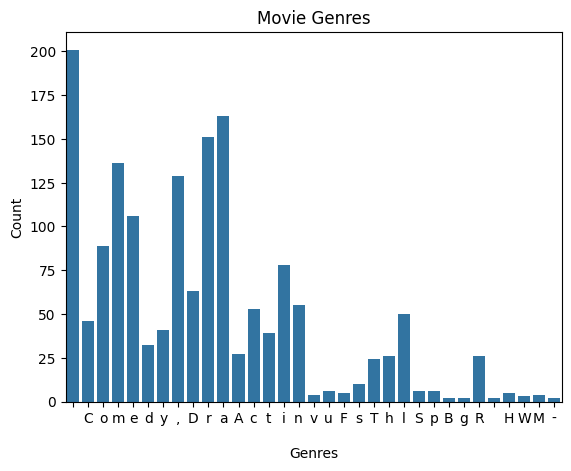

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('movies.csv') 
data_new = data.dropna(subset=['Genre'])
genres = [genre for sublist in data_new['Genre'] for genre in sublist]
sns.countplot(x=genres)
plt.title("Movie Genres")
plt.xlabel("Genres")
plt.ylabel("Count")
plt.show()

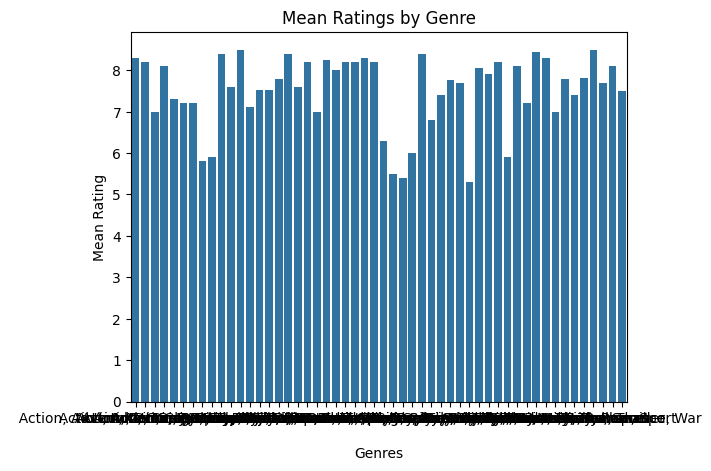

In [11]:
# Calculate the mean rating for each genre
mean_ratings = data_new.explode('Genre').groupby('Genre')['Rating'].mean()
sns.barplot(x=mean_ratings.index, y=mean_ratings.values)
plt.title("Mean Ratings by Genre")
plt.xlabel("Genres")
plt.ylabel("Mean Rating")
plt.show()

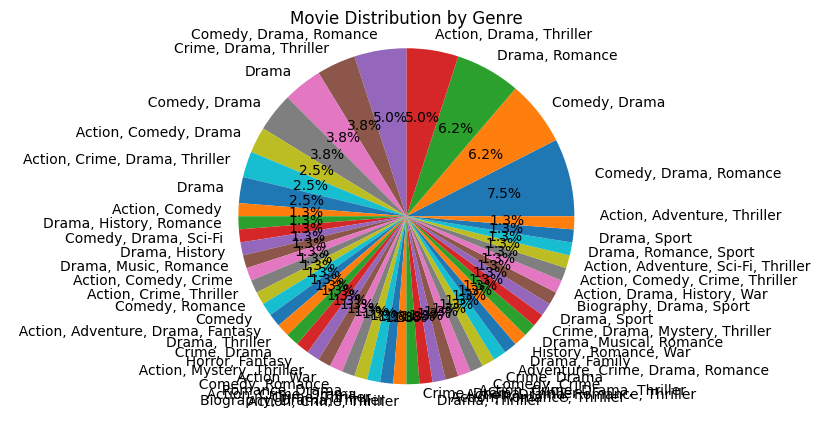

In [12]:
import matplotlib.pyplot as plt
genre_counts = data_new['Genre'].explode().value_counts()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Movie Distribution by Genre")
plt.show()

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

def predict_genre(title, description):
    clf = LogisticRegression()
    clf.fit(xtrain_tfidf, ytrain)
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
    tfidf_vectorizer.fit(xtrain['Movie'])

    movie_tfidf = tfidf_vectorizer.transform([title + ' ' + description])

    # Make predictions on the input movie
    y_pred_prob = clf.predict_proba(movie_tfidf)
    y_pred_new = (y_pred_prob >= 0.3).astype(int)
    genre_pred = clf.predict(movie_tfidf)

    print("Predicted Probabilities:")
    print(y_pred_prob)
    print("\nBinary Predictions (Threshold = 0.3):")
    print(y_pred_new)
    print("\nPredicted Genre:")
    print(genre_pred)

# Example 
title = "The Matrix"
description = "A computer hacker learns from mysterious rebels about the true nature of his reality and his role in the war against its controllers."
predict_genre(title, description)

Predicted Probabilities:
[[0.02121001 0.01477981 0.02818218 0.01477981 0.01477981 0.01477981
  0.01477981 0.02003884 0.01477981 0.01477981 0.01477981 0.02818218
  0.06242863 0.01477981 0.01477981 0.02818218 0.01477981 0.01457634
  0.01477981 0.01477981 0.01477981 0.01477981 0.01477981 0.02818218
  0.01477981 0.074557   0.01477981 0.02363583 0.05190743 0.02818218
  0.01477981 0.01474159 0.01477981 0.04050929 0.05337834 0.01470544
  0.01477981 0.01477981 0.09514955 0.01753527 0.01477981 0.01477981]]

Binary Predictions (Threshold = 0.3):
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0]]

Predicted Genre:
['Drama, Romance']
